# Loan Prediction 


In [15]:
import numpy as np

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
  
data = pd.read_csv("Loan_Approval_Prediction.csv")

#display(data)

# Display the first 5 rows
display(data.head(5))

# Identify data types of each column
data_types = data.dtypes

# Count unique data types
unique_data_types = data_types.nunique()

print(f"Number of distinct data types: {unique_data_types}")

# Optional: Display data types for each column
print(data_types)

# Dropping Loan_ID column 
data.drop(['Loan_ID'],axis=1,inplace=True)

#display(data)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Number of distinct data types: 3
Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
593,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Gender                True
Married               True
Dependents           False
Education             True
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area         True
Loan_Status           True
dtype: bool
Columns with dtype 'object':
Gender


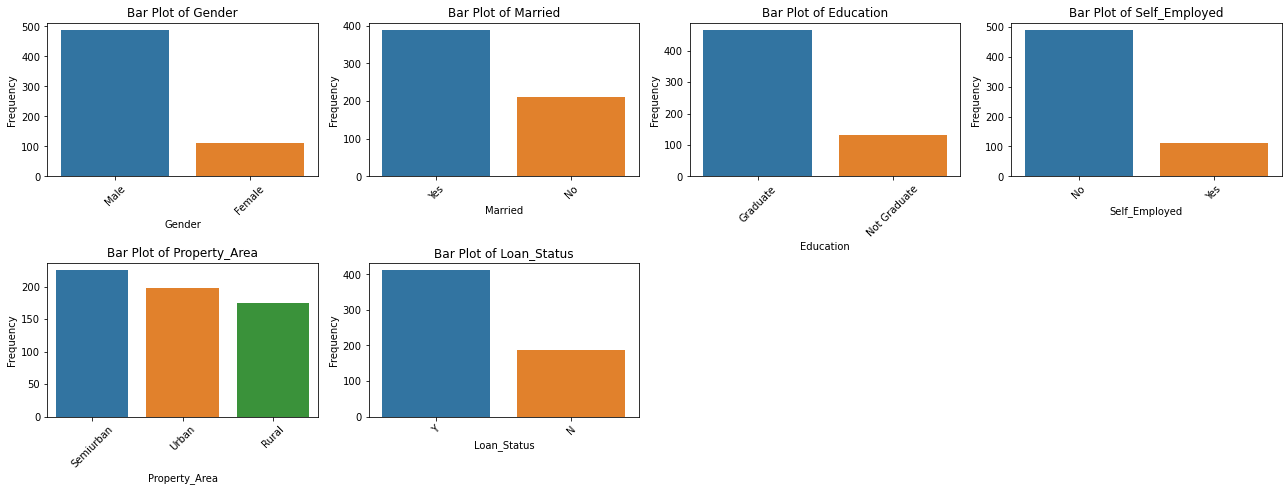

In [34]:
obj = (data.dtypes == 'object')
print(obj)

object_columns = data.columns[obj]

# Display the selected columns
print("Columns with dtype 'object':")
print(object_columns[0])

plt.figure(figsize=(18,36))

index = 1

for col in object_columns: 

    plt.subplot(11,4,index)
    value_counts = data[col].value_counts() #Obtaining counts of each object column
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(f"Bar Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    index += 1
    


Categorical variables: 0


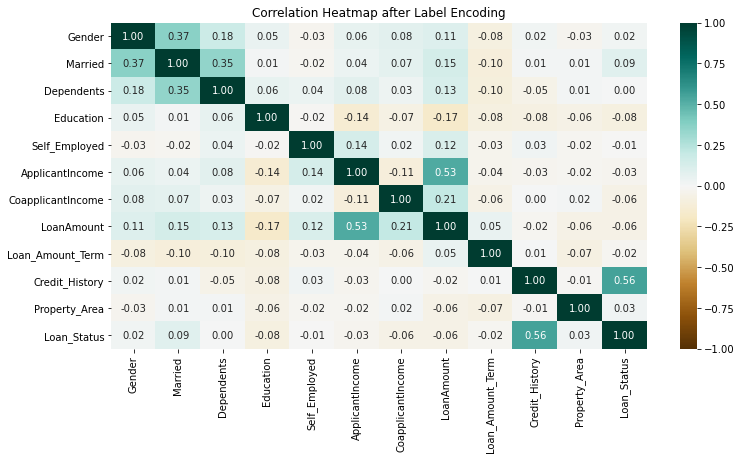

In [45]:
# Import label encoder 
from sklearn import preprocessing 
    
# label_encoder object knows how  
# to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
obj = (data.dtypes == 'object') 
for col in list(obj[obj].index): 
  data[col] = label_encoder.fit_transform(data[col])


# To find the number of columns with  
# datatype==object 
obj = (data.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))

#display(data.head(5))

correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG', fmt='.2f', vmin=-1, vmax=1)

plt.title("Correlation Heatmap after Label Encoding")
plt.show()


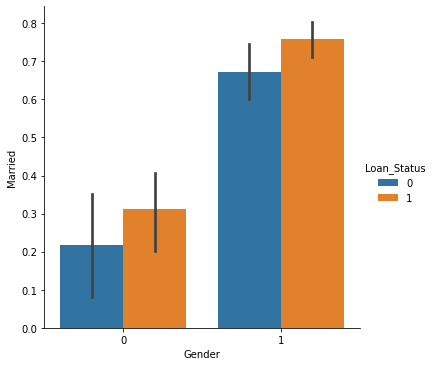

In [48]:
sns.catplot(x="Gender", y="Married", 
            hue="Loan_Status",  
            kind="bar",  
            data=data)
# set ci=None to remove the confidence intervals


In [53]:
# Check for missing values in the entire dataset
missing_values = data.isnull().sum()

print("Missing values in the dataset:")
print(missing_values)

#Fill missing values with mean values of each column. 

for col in data.columns: 
    data[col] = data[col].fillna(data[col].mean())  
    
data.isna().sum()

Missing values in the dataset:
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [113]:
# from pandas.plotting import scatter_matrix

# scatter_matrix(data, alpha=0.2, figsize=(12, 12), diagonal='hist')


In [72]:
from sklearn.model_selection import train_test_split

X = data.drop(["Loan_Status"], axis = 1)
y = data["Loan_Status"]
X.shape, y.shape
print(X.shape)
print(Y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1)


(598, 11)
(598,)


# KNN

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


**Classification Accuracy:** The ratio of correct predictions to the total number of predictions, so the proportion of test points predicted correctly. This is therefore defined as: 

\begin{equation*}
    \text{Accuracy} = \frac{N_{\text{correct}}}{N_{\text{total}}},
\end{equation*}

where $N_{\text{correct}}$ denotes the number of correctly predicted test points and $N_{\text{total}}$ denotes the total number of test points.

In [95]:
import pickle

df = pd.DataFrame(columns=['n_neighbors','weights','test_accuracy', 'cross-validation score (mean)'])
list_of_weights = ['uniform','distance']
list_of_neighbors = [3, 8, 15, 25, 40]

best_acc = 0

for w in list_of_weights: 
    for n in list_of_neighbors:
        model = KNeighborsClassifier(n_neighbors = n, weights = w)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        cv = cross_val_score(model, X_train, y_train)
        df = df.append({'n_neighbors': n, 'weights': w, 'test_accuracy': acc, 'cross-validation score (mean)': cv.mean()}, ignore_index=True)
        if best_acc < acc:
            best_acc = acc
            with open('loan_knn.pkl','wb') as f:
                pickle.dump(model,f)

display(df)
 

,n_neighbors,weights,test_accuracy,cross-validation score (mean)
0,3,uniform,0.600000,0.617149
1,8,uniform,0.608333,0.617039
2,15,uniform,0.691667,0.663070
3,25,uniform,0.700000,0.667281
4,40,uniform,0.708333,0.671513
5,3,distance,0.616667,0.617171
6,8,distance,0.608333,0.631776
7,15,distance,0.650000,0.656820
8,25,distance,0.675000,0.677763
9,40,distance,0.683333,0.675658


In [96]:
# Load the best performing model
with open('loan_knn.pkl','rb') as f:
    best_knn = pickle.load(f)
    
print(best_knn)

KNeighborsClassifier(n_neighbors=40)


# SVC

In [104]:
from sklearn.svm import SVC
from tqdm import tqdm

# list_of_C = [1.0]
# list_of_kernels = ['linear','poly']
# # list_of_C = [1.0, 10.0, 100.0]
# # list_of_kernels = ['linear','poly','rbf','sigmoid']

model = SVC()
cv = cross_val_score(model, X_train, y_train, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f'accuracy is {acc}')
print(f'cross-validation score is {cv.mean()}')

# SVC_df = pd.DataFrame(columns=['C','kernel','test_accuracy','mean_cv_score'])

# for c in tqdm(list_of_C, desc="C values"):
#     for k in tqdm(list_of_kernels, desc="Kernel types", leave=False):
#         model = SVC(C=c, kernel=k)
#         cv = cross_val_score(model, X_train, y_train, cv=5)
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)
#         acc = accuracy_score(y_test, y_pred)
#         model_df = pd.DataFrame([[c, k, acc, cv.mean()]], columns=['C', 'kernel', 'test_accuracy', 'mean_cv_score'])
#         SVC_df = pd.concat([SVC_df, model_df], ignore_index=True)

# display(SVC_df)
                                 

accuracy is 0.725
cross-validation score is 0.6736184210526316


# Logistic Regression

**Logistic Regression** is a statistical model used for predicting the outcome of a categorical dependent variable based on one or more predictor variables. It is commonly used for binary classification tasks.

## The Logistic Function

The logistic function, or sigmoid function, maps any real-valued number into a value between 0 and 1.

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

 
where
$$ 
z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n 
$$

**Interpretation**: Outputs a probability value \( P(Y=1|X) \), where \( Y \) is the dependent variable and \( X \) represents the independent variables.

## Logistic Regression Model

The model estimates the probability of the dependent variable belonging to a category as a function of the predictor variables.

$$
P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n)}}
$$

Log Odds:

$$
\text{logit}(P) = \log\left(\frac{P}{1-P}\right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n
$$

## Fitting the Model

**Maximum Likelihood Estimation (MLE)** is used to find the best-fitting parameters \( \beta \) by maximizing the likelihood function. This is done iteratively, usually via methods like Gradient Descent or optimization algorithms (e.g., Newton-Raphson).

## Model Evaluation

**Metrics**:
- **Accuracy**: Proportion of correct predictions.
- **Confusion Matrix**: Summarizes true positives, false positives, true negatives, and false negatives.
- **Precision, Recall, and F1 Score**: Metrics for evaluating classification performance.
- **ROC Curve and AUC**: Visual representation of model performance across different thresholds.



In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(penalty = "l1", C = 1.0, solver = 'liblinear', max_iter = 100)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Varying hyperparameters: 

penalty = ["l1", "l2"]
C = [0.001, 0.01, 0.1, 1.0, 10.0]
solver = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
max_iter = [100, 200, 300]

results = []

LR_df = pd.DataFrame(columns=['C','solver', 'Max Iterations','Test Accuracy'])
    
for c in C: 
    for s in solver: 
        for m in max_iter: 
            model = LogisticRegression(C = c, solver = s, max_iter = m)
            model.fit(X_train, y_train)

            # Make predictions on the test set
            y_pred = model.predict(X_test)
            
            # Evaluate the model
            accuracy = accuracy_score(y_test, y_pred)
            print(accuracy)
            conf_matrix = confusion_matrix(y_test, y_pred)
            class_report = classification_report(y_test, y_pred)
            model_df = pd.DataFrame([[c, s, m, acc]], columns= ['C', 'solver', 'Max Iterations' ,'Test Accuracy'])
            LR_df = pd.concat([LR_df, model_df], ignore_index=True)
            results.append((c, s, m, accuracy))
            
#             print(conf_matrix)
#             print(class_report)
                      
                

Accuracy: 0.8666666666666667

Confusion Matrix:
 [[18 15]
 [ 1 86]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.55      0.69        33
           1       0.85      0.99      0.91        87

    accuracy                           0.87       120
   macro avg       0.90      0.77      0.80       120
weighted avg       0.88      0.87      0.85       120

0.725
0.725
0.725
0.7333333333333333
0.7333333333333333
0.7333333333333333
0.725
0.725
0.725
0.725


/Users/charliestamp/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/charliestamp/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/charliestamp/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

0.725
0.725
0.725
0.725
0.725
0.725
0.725
0.725
0.7333333333333333
0.7333333333333333


/Users/charliestamp/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/charliestamp/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/charliestamp/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/Users/charliestamp/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/charliestamp/opt/anaconda3/lib/python3.8/site-packages/sklearn/m

0.7333333333333333
0.725
0.725
0.725
0.725
0.725
0.725
0.725
0.725
0.725
0.8666666666666667
0.8666666666666667
0.8666666666666667
0.8666666666666667
0.8666666666666667
0.8666666666666667
0.8666666666666667
0.8666666666666667
0.8666666666666667
0.725
0.725
0.725
0.725


/Users/charliestamp/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/charliestamp/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/charliestamp/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/charliestamp/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/charliestamp/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_mod

0.725
0.725
0.8666666666666667
0.8666666666666667
0.8666666666666667
0.8666666666666667
0.8666666666666667
0.8666666666666667
0.85
0.85
0.85
0.725
0.725
0.725
0.725
0.725
0.725
0.8583333333333333
0.8583333333333333
0.8583333333333333


/Users/charliestamp/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/charliestamp/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/charliestamp/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/charliestamp/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py

0.8666666666666667
0.8666666666666667
0.8666666666666667
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.725
0.725


/Users/charliestamp/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/charliestamp/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/charliestamp/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/charliestamp/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/charliestamp/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_mod

0.725
0.725
0.725
0.725


/Users/charliestamp/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/charliestamp/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/charliestamp/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/charliestamp/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py

,C,solver,Max Iterations,Test Accuracy
0,0.001,liblinear,100,0.725
1,0.001,liblinear,200,0.725
2,0.001,liblinear,300,0.725
3,0.001,newton-cg,100,0.725
4,0.001,newton-cg,200,0.725
...,...,...,...,...
70,10.000,sag,200,0.725
71,10.000,sag,300,0.725
72,10.000,saga,100,0.725
73,10.000,saga,200,0.725


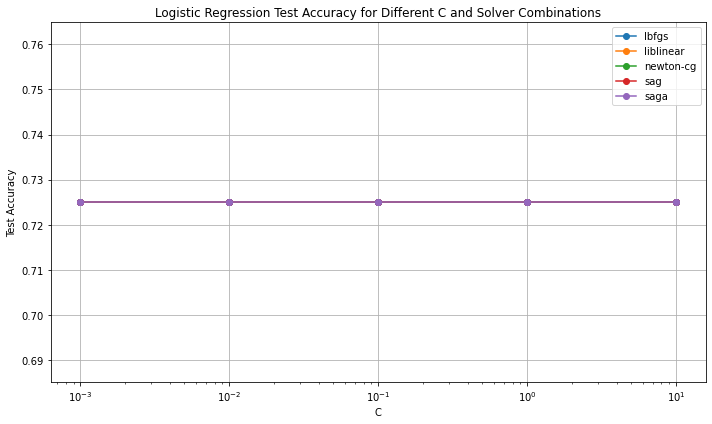

In [124]:
display(LR_df)

# Plot C against Test Accuracy
plt.figure(figsize=(10, 6))
for solver_name, group in LR_df.groupby('solver'):
    plt.plot(group['C'], group['Test Accuracy'], marker='o', linestyle='-', label=solver_name)

plt.xscale('log')  # Use logarithmic scale for C axis
plt.xlabel('C')
plt.ylabel('Test Accuracy')
plt.title('Logistic Regression Test Accuracy for Different C and Solver Combinations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Random Forest

In [129]:
from sklearn.ensemble import RandomForestClassifier


list_max_depth = [5, 10]
list_n_estimators = [100, 250, 500]
list_min_samples_split = [2, 4, 8]
list_min_samples_leaf = [5, 10]

df = pd.DataFrame(columns=['Max Depth', 'Minimum Samples Split', 'Leaf Minimum Samples Split', 'Accuracy Score'])

best_hyperparameters = {}  # Store the best hyperparameters and accuracy
best_acc = 0

for md in list_max_depth:
    for n in list_n_estimators:
        for mss in list_min_samples_split:
            for msl in list_min_samples_leaf:
                clf = RandomForestClassifier(n_estimators=n,
                                             min_samples_split=mss,
                                             min_samples_leaf=msl,
                                             oob_score=True,
                                             random_state=1)

                clf.fit(X_train, y_train)
                pred = clf.predict(X_test)
                acc = accuracy_score(y_test, clf.predict(X_test))
                model_df = pd.DataFrame([[md, mss, msl, acc]],
                                         columns=['Max Depth', 'Minimum Samples Split', 'Leaf Minimum Samples Split',
                                                  'Accuracy Score'])
                df = pd.concat([df, model_df])
                if acc > best_acc:
                    best_acc = acc
                    best_hyperparameters = {'Max Depth': md, 'Minimum Samples Split': mss,
                                            'Leaf Minimum Samples Split': msl, 'Accuracy Score': acc}
                    with open('varied_RandomForest.pkl', 'wb') as f:
                        pickle.dump(clf, f)

# Output the best hyperparameters and accuracy
print("Best Hyperparameters:")
print(best_hyperparameters)

# Display the DataFrame with all combinations and their accuracies
display(df)

# Load the best model
with open('varied_RandomForest.pkl', 'rb') as f:
    clf = pickle.load(f)

print(clf)

Best Hyperparameters:
{'Max Depth': 5, 'Minimum Samples Split': 2, 'Leaf Minimum Samples Split': 10, 'Accuracy Score': 0.8583333333333333}


,Max Depth,Minimum Samples Split,Leaf Minimum Samples Split,Accuracy Score
0,5,2,5,0.850000
0,5,2,10,0.858333
0,5,4,5,0.850000
0,5,4,10,0.858333
0,5,8,5,0.850000
0,5,8,10,0.858333
0,5,2,5,0.841667
0,5,2,10,0.858333
0,5,4,5,0.841667
0,5,4,10,0.858333


RandomForestClassifier(min_samples_leaf=10, oob_score=True, random_state=1)


In [132]:
rfc = RandomForestClassifier(n_estimators = 7, 
                             criterion = 'entropy', 
                             random_state =7)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
acc = accuracy_score(y_test, rfc.predict(X_test))
print(acc)


0.8




## TAKEAWAYS: 

### What is Label Encoding? 

IN ML, Datasets can have different categorical columns where some columns have their elements in the ordinal variable category. E.g. for income, three different elements could be low, medium, or high. We want to convert the elements to 1,2, or 3, to apply ML techniques. We try to preserve the meaning of the element where higher weights are assigned to the weights havig higher priority.

*To summarise:*

**Label Encoding** is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project.


# Breast Cancer (Wisconsin) Prediction 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 
  
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from xgboost import XGBClassifier 
from sklearn import metrics 
  
import warnings 
warnings.filterwarnings('ignore')



In [2]:

# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# Feature names
feature_names = [
    "ID", "Diagnosis",
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", 
    "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", 
    "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", 
    "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"
]

# Read the dataset
data = pd.read_csv(url, header=None, names=feature_names)
display(data)

for i in range(len(data)):
    if data.loc[i, 'Diagnosis'] == "M":
        print('Malignant')
    else: 
        print("benign")


,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Malignant
Malignant
Malignant
Malignant
Malignant
Malignant
Malignant
Malignant
Malignant
Malignant
Malignant
Malignant
Malignant
Malignant
Malignant
Malignant
Malignant
Malignant
Malignant
benign
benign
benign
Malignant
Malignant
Malignant
Malignant
Malignant
Malignant
Malignant
Malignant
Malignant
Malignant
Malignant
Malignant
Malignant
Malignant
Malignant
benign
Malignant
Malignant
Malignant
Malignant
Malignant
Malignant
Malignant
Malignant
benign
Malignant
benign
benign
benign
benign
benign
Malignant
Malignant
benign
Malignant
Malignant
benign
benign
benign
benign
Malignant
benign
Malignant
Malignant
benign
benign
benign
benign
Malignant
benign
Malignant
Malignant
benign
Malignant
benign
Malignant
Malignant
benign
benign
benign
Malignant
Malignant
benign
Malignant
Malignant
Malignant
benign
benign
benign
Malignant
benign
benign
Malignant
Malignant
benign
benign
benign
Malignant
Malignant
benign
benign
benign
benign
Malignant
benign
benign
Malignant
benign
benign
benign
benign
benig

In [3]:
#display(data.head(5))

data_types = data.dtypes
#display(data.head(5))

#data.info() 

data.drop(['ID'], axis = 1)

# Update the 'Diagnosis' column to 1.0 for 'M' and 0.0 otherwise using a for loop
for i in range(len(data)):
    if data.loc[i, 'Diagnosis'] == "M":
        data.loc[i, 'Diagnosis'] = 1
    else:
        data.loc[i, 'Diagnosis'] = 0

# Display the updated DataFrame
#display(data.head(5))

display(data)   

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [20]:
y = [data.loc[i, 'Diagnosis'] for i in range(len(data))]
X = data.drop(['ID','Diagnosis'], axis = 1)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size = 0.2, random_state = 42) 

model = LogisticRegression(C = 1.0, solver = 'liblinear', max_iter = 100)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
            
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'The accuracy of this model is: {accuracy}')
print(conf_matrix)
print(class_report)


The accuracy of this model is: 0.956140350877193
[[70  1]
 [ 4 39]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# MNIST handwritten dataset: 

